In [1]:
import xml.etree.ElementTree as et
import os
import pandas as pd
import datetime

In [2]:
data_directory = "C:\\Users\\janos\\data\\apple_health_export\\" # Edit this to point to your own directory

In [3]:
cda_filename = os.path.join(data_directory, "export_cda.xml")

In [4]:
cda = et.parse(cda_filename)

In [5]:
observations = list(cda.iterfind("./{urn:hl7-org:v3}entry/{urn:hl7-org:v3}organizer/{urn:hl7-org:v3}component/{urn:hl7-org:v3}observation"))

In [6]:
len(observations)

97325

In [7]:
parsed_observations_list = []
for observation in observations:
    observation_dict = {}
    
    coding_info = observation.find("{urn:hl7-org:v3}code").attrib
    for key in coding_info:
        observation_dict[key] = coding_info[key]
            
    value_info = observation.find("{urn:hl7-org:v3}value").attrib
    for key in value_info:
        observation_dict[key] = value_info[key]
        
    if "value" in observation_dict:
        try:
            observation_dict["value_parsed"] = float(observation_dict["value"])
        except ValueError:
            obervation_dict["value_parsed"] = None
        
    low_effective_time_info = observation.find("{urn:hl7-org:v3}effectiveTime/{urn:hl7-org:v3}low").attrib
    high_effective_time_info = observation.find("{urn:hl7-org:v3}effectiveTime/{urn:hl7-org:v3}high").attrib
    
    effective_time_info = {}
    effective_time_info["low_effective_time"] = low_effective_time_info["value"]
    effective_time_info["low_effective_time_parsed"] = datetime.datetime.strptime(effective_time_info["low_effective_time"], "%Y%m%d%H%M%S%z")
    effective_time_info["high_effective_time"] = low_effective_time_info["value"]
    effective_time_info["high_effective_time_parsed"] = datetime.datetime.strptime(effective_time_info["low_effective_time"], "%Y%m%d%H%M%S%z")
    
    for key in effective_time_info:
        observation_dict[key] = effective_time_info[key]
        
    interpretation_info = observation.find("{urn:hl7-org:v3}interpretationCode").attrib
    for key in interpretation_info:
        observation_dict["interpretation_" + key] = interpretation_info[key]
        
    status_info = observation.find("{urn:hl7-org:v3}statusCode").attrib
    for key in status_info:
        observation_dict["status_" + key] = status_info[key]
        
    parsed_observations_list += [observation_dict]
    

In [8]:
parsed_observations_list[20]

{'code': '8867-4',
 'codeSystem': '2.16.840.1.113883.6.1',
 'codeSystemName': 'LOINC',
 'displayName': 'Heart rate',
 'high_effective_time': '20160916203246-0500',
 'high_effective_time_parsed': datetime.datetime(2016, 9, 16, 20, 32, 46, tzinfo=datetime.timezone(datetime.timedelta(-1, 68400))),
 'interpretation_code': 'N',
 'interpretation_codeSystem': '2.16.840.1.113883.5.83',
 'low_effective_time': '20160916203246-0500',
 'low_effective_time_parsed': datetime.datetime(2016, 9, 16, 20, 32, 46, tzinfo=datetime.timezone(datetime.timedelta(-1, 68400))),
 'status_code': 'completed',
 'unit': 'count/min',
 'value': '97',
 'value_parsed': 97.0,
 '{http://www.w3.org/2001/XMLSchema-instance}type': 'PQ'}

In [9]:
observations_df = pd.DataFrame(parsed_observations_list)

In [10]:
observations_df.tail(5)

,code,codeSystem,codeSystemName,displayName,high_effective_time,high_effective_time_parsed,interpretation_code,interpretation_codeSystem,low_effective_time,low_effective_time_parsed,status_code,unit,value,value_parsed,{http://www.w3.org/2001/XMLSchema-instance}type
97320,8462-4,2.16.840.1.113883.6.1,LOINC,Diastolic blood pressure,20170804212559-0500,2017-08-04 21:25:59-05:00,N,2.16.840.1.113883.5.83,20170804212559-0500,2017-08-04 21:25:59-05:00,completed,mmHg,76,76.0,PQ
97321,8462-4,2.16.840.1.113883.6.1,LOINC,Diastolic blood pressure,20170814072209-0500,2017-08-14 07:22:09-05:00,N,2.16.840.1.113883.5.83,20170814072209-0500,2017-08-14 07:22:09-05:00,completed,mmHg,82,82.0,PQ
97322,8462-4,2.16.840.1.113883.6.1,LOINC,Diastolic blood pressure,20170814072304-0500,2017-08-14 07:23:04-05:00,N,2.16.840.1.113883.5.83,20170814072304-0500,2017-08-14 07:23:04-05:00,completed,mmHg,78,78.0,PQ
97323,8462-4,2.16.840.1.113883.6.1,LOINC,Diastolic blood pressure,20170904213809-0500,2017-09-04 21:38:09-05:00,N,2.16.840.1.113883.5.83,20170904213809-0500,2017-09-04 21:38:09-05:00,completed,mmHg,68,68.0,PQ
97324,8462-4,2.16.840.1.113883.6.1,LOINC,Diastolic blood pressure,20170904213915-0500,2017-09-04 21:39:15-05:00,N,2.16.840.1.113883.5.83,20170904213915-0500,2017-09-04 21:39:15-05:00,completed,mmHg,69,69.0,PQ


In [11]:
observations_df.dtypes

code                                                                  object
codeSystem                                                            object
codeSystemName                                                        object
displayName                                                           object
high_effective_time                                                   object
high_effective_time_parsed                         datetime64[ns, UTC-05:00]
interpretation_code                                                   object
interpretation_codeSystem                                             object
low_effective_time                                                    object
low_effective_time_parsed                          datetime64[ns, UTC-05:00]
status_code                                                           object
unit                                                                  object
value                                                                 object

In [12]:
len(observations_df)

97325

In [13]:
pd.value_counts(observations_df["displayName"])

Heart rate                  97268
Diastolic blood pressure       24
Systolic blood pressure        24
Body weight Measured            5
Height                          4
Name: displayName, dtype: int64

In [14]:
heart_rates_df = observations_df[observations_df["displayName"] == "Heart rate"]

In [15]:
import seaborn as sns

In [16]:
%matplotlib inline

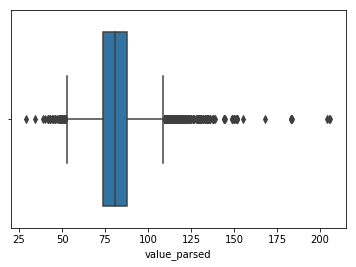

In [17]:
sns.boxplot(heart_rates_df["value_parsed"])

In [18]:
heart_rates_df["low_effective_time_parsed"].min(), heart_rates_df["low_effective_time_parsed"].max(), 

(Timestamp('2016-09-16 19:45:41-0500', tz='UTC-05:00'),
 Timestamp('2018-02-16 11:11:08-0500', tz='UTC-05:00'))

In [19]:
heart_rates_df["year"] = heart_rates_df.apply(lambda x: str(x["low_effective_time_parsed"].year), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


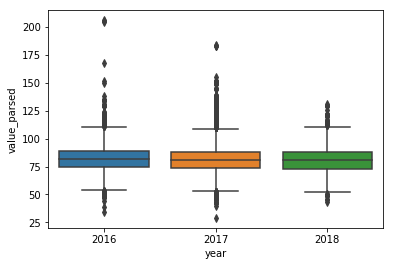

In [20]:
sns.boxplot(x=heart_rates_df["year"], y=heart_rates_df["value_parsed"])

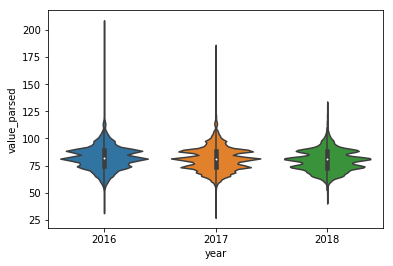

In [21]:
sns.violinplot(x=heart_rates_df["year"], y=heart_rates_df["value_parsed"])

In [22]:
heart_rates_df["hour"] = heart_rates_df.apply(lambda x: x["low_effective_time_parsed"].hour, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


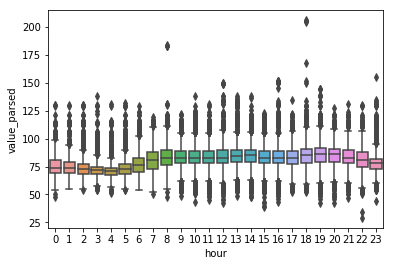

In [23]:
sns.boxplot(x=heart_rates_df["hour"], y=heart_rates_df["value_parsed"])

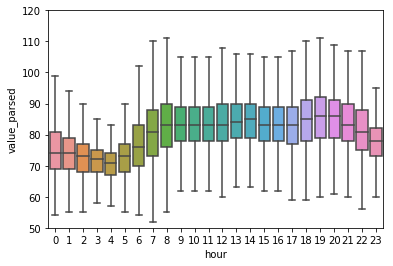

In [24]:
import matplotlib.pyplot as plt
plt.ylim(50, 120)
bplot = sns.boxplot(x=heart_rates_df["hour"], y=heart_rates_df["value_parsed"], showfliers=False)
